In [13]:
import pandas as pd
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv("../data/submissions.csv")
eviction_df = df[df["outcome"] == "eviction"]
eviction_df = eviction_df[eviction_df["truth"].notna()]
eviction_df = eviction_df[(eviction_df["prediction"] <= 1) & (eviction_df["prediction"] >= 0)] # four models have invalid predictions (>1 or < 0 outputs)

In [32]:
# eviction_df[(eviction_df["prediction"]) > 1 | (eviction_df["prediction"] < 0)]

,outcome,outcome_name,account,challengeID,prediction,truth,ybar_train,r2_holdout,beatingBaseline


In [38]:
eviction_df["challengeID"].nunique()
eviction_df["account"].nunique()

159

In [39]:
grouped = eviction_df.groupby("account")

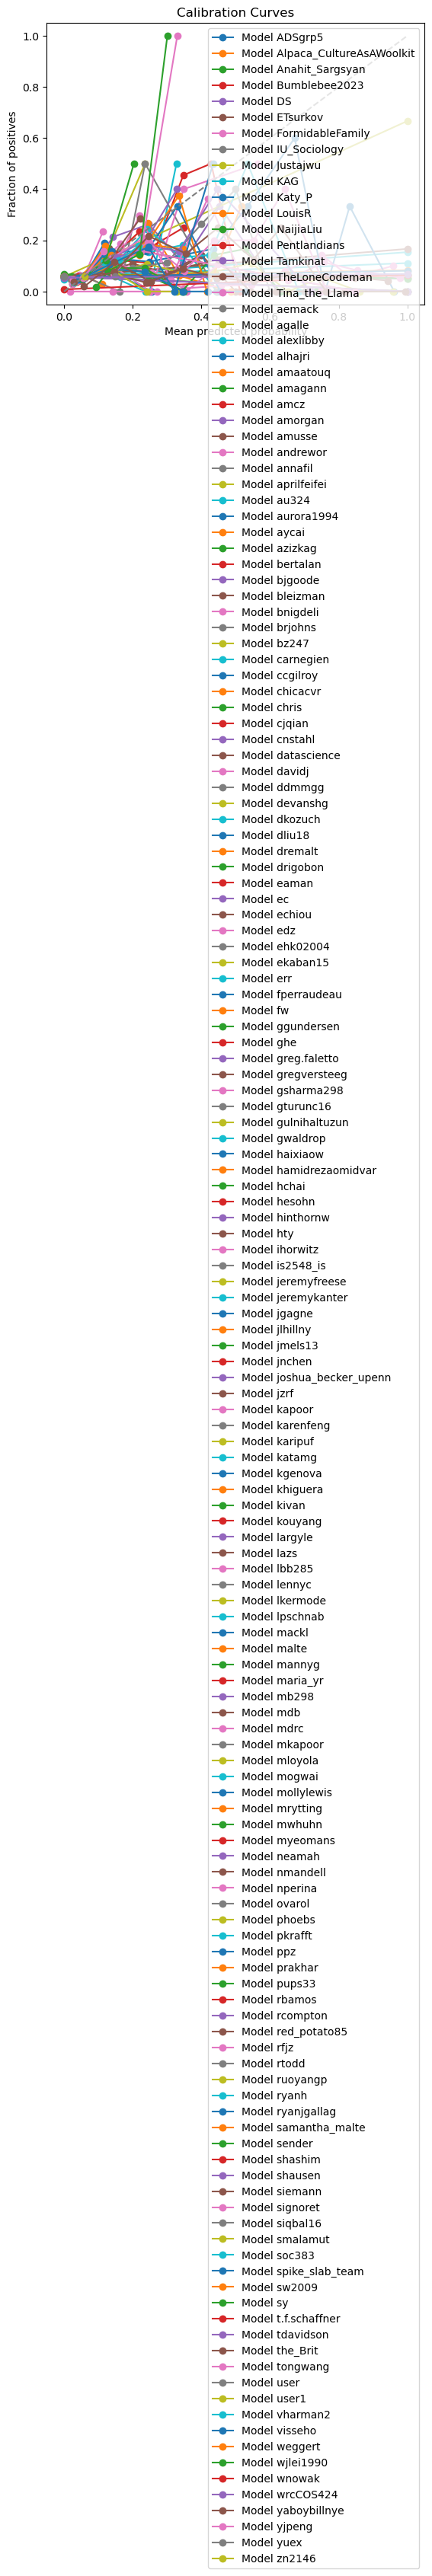

In [41]:
fig, ax = plt.subplots()

# Loop through each group and calculate the calibration curve
for name, group in grouped:
    prob_true, prob_pred = calibration_curve(group['truth'], group['prediction'], n_bins=2)
    
    # Plot each curve on the same plot for comparison
    ax.plot(prob_pred, prob_true, marker='o', label=f'Model {name}')

ax.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Add a perfectly calibrated line
ax.set_xlabel('Mean predicted probability')
ax.set_ylabel('Fraction of positives')
ax.set_title('Calibration Curves')
ax.legend()

plt.show()